# Energy Company Finance & Collections Data Analyst Case Study 

### Problem

You’ve been asked by the management team to look into ways of categorising and forecasting debt for a group of customers. 
In particular, they would like you to:
1. Using SQL only, from the transactions table, find the total value of payments made in December 2020


2. Using the balances table, you have been given the opening balance of customers in July 2020, describe the differences in opening balance across all of the customers, feel free to support your answer with graphs to highlight your points.


3. A customer’s closing balance is determined by adding payments and subtracting charges to their opening balance. Using the  balances table to determine a customer’s opening balance, and the transactions table to determine their payments and charges,  illustrate a) a plot of a single customer’s (cust_id: 951) balance for each month and b) determine whether the following customers (927, 1337, 3217, 4718) are paying sufficient amounts to ensure their closing balance in July 2021 is not lower than their opening balance in July 2020


4. Given a price increase of 10% at the end of July 2020, calculate an estimate for what each customer’s closing balance will be in July 2021, assuming payment amounts stay the same. What proportion will have become debtors (having a positive opening balance in July 2020 and then having a closing negative balance in July 2021)?


5. Any other insight you can extract 


If you have time, the management team would like to understand which customers are paying the correct Direct Debit amount (note this only applies to Fixed Direct Debit customers). 
For the customers in question 3, part b) of those which are paying insufficient amounts, what value should the payment amount be increased to so that the closing balance in July 2021 is not less than the opening balance in July 2020? When do you think would be the best time of year to change the payment amount?

### Data

You’ve been provided with sql database containing 2 tables:

* ***Balance*** - the opening balance for sample of customers from July 2020 :
* cust_id - unique customer id
* report_date - the date the opening balance was determined
* sales_channel - the unique identifier of the sales channel through which the customer was acquired. This has been anonymised for commercial reasons
* balance_issued - the opening balance of the customer’s account. Positive values indicate a customer is in credit (the company owe the customer), negative values indicate the customer is in debt (customer owes to the company)
* payment_method - the categorisation of payment method of the customer. Fixed DD stands for Fixed Direct Debit, POROB stands for ‘Payment on Receipt of Bill’


* ***Transactions*** - the charges and payments made between July 2020 and July 2021
* cust_id - unique customer id
* transaction_date - date of the charge or payment
* transaction_type - whether the transaction is a charge or payment. Note charges equate to the cost amount, in pounds, of energy used for either Gas or Electricity (i.e. if a customer consumes both, they will receive two separate charges, one for each fuel type, usually these charges are received once a month although the frequency can differ)
* amount_in_pounds - the sterling value of the transaction


In [1]:
# Import all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy

In [2]:
# Enables to run SQLite queries directly 
%load_ext sql

In [3]:
sqlalchemy.create_engine('sqlite:///case_study.db')

Engine(sqlite:///case_study.db)

In [4]:
%sql sqlite:///case_study.db


### Check for missing values in both tables

In [5]:
%%sql
SELECT COUNT(*) 
FROM balance 
WHERE report_date + sales_channel + balance_issued + payment_method + cust_id IS NULL;

 * sqlite:///case_study.db
Done.


COUNT(*)
0


In [6]:
%%sql
SELECT COUNT(*) 
FROM transactions 
WHERE transaction_date + transaction_type + amount_in_pounds + cust_id IS NULL;

 * sqlite:///case_study.db
Done.


COUNT(*)
0


### 1. Using SQL only, from the transactions table, find the total value of payments made in December 2020

In [7]:
%%sql
SELECT SUM(amount_in_pounds) AS 'Total payments December 2020' 
FROM transactions 
WHERE transaction_date BETWEEN '2020-12-01 00:00:00' AND '2020-12-31 00:00:00' AND transaction_type = 'accountpayment'

 * sqlite:///case_study.db
Done.


Total payments December 2020
306405.22


The total Value of payments made in December 2020 is 306405.22 pounds

### 2. Using the balances table, you have been given the opening balance of customers in July 2020, describe the differences in opening balance across all of the customers, feel free to support your answer with graphs to highlight your points

In [8]:
# Import sqlite3 library to being able to transform the queries to dataframes using pandas
import sqlite3

# Create connection.
cnx = sqlite3.connect('case_study.db')

df_balance = pd.read_sql_query("SELECT * FROM balance", cnx)
df_balance

,report_date,sales_channel,balance_issued,payment_method,cust_id
0,2020-07-31 00:00:00,A,317.04,Fixed DD,4718
1,2020-07-31 00:00:00,D,-94.22,Fixed DD,4588
2,2020-07-31 00:00:00,D,70.89,Fixed DD,4493
3,2020-07-31 00:00:00,A,425.82,Fixed DD,6162
4,2020-07-31 00:00:00,A,311.73,Fixed DD,3217
...,...,...,...,...,...
3632,2020-07-31 00:00:00,C,195.33,Fixed DD,2281
3633,2020-07-31 00:00:00,D,289.72,Fixed DD,3946
3634,2020-07-31 00:00:00,D,0.03,POROB,1748
3635,2020-07-31 00:00:00,D,226.41,Fixed DD,871


In [9]:
# Some customers appear twice in the data set because they have contracted more than one service, to avoid repetitions these are added together.
df_balance_no_duplicates = df_balance.groupby('cust_id', as_index=False).sum()

df_balance_no_duplicates

C:\Users\jfalb\AppData\Local\Temp\ipykernel_9992\2973424585.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_balance_no_duplicates = df_balance.groupby('cust_id', as_index=False).sum()


,cust_id,balance_issued
0,1,517.93
1,2,-21.31
2,7,192.89
3,14,336.32
4,17,-139.56
...,...,...
3084,7487,-295.83
3085,7489,-31.73
3086,7491,92.79
3087,7492,116.79


In [10]:
# Change the plot style
plt.style.use('seaborn-whitegrid')

C:\Users\jfalb\AppData\Local\Temp\ipykernel_9992\2352405180.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


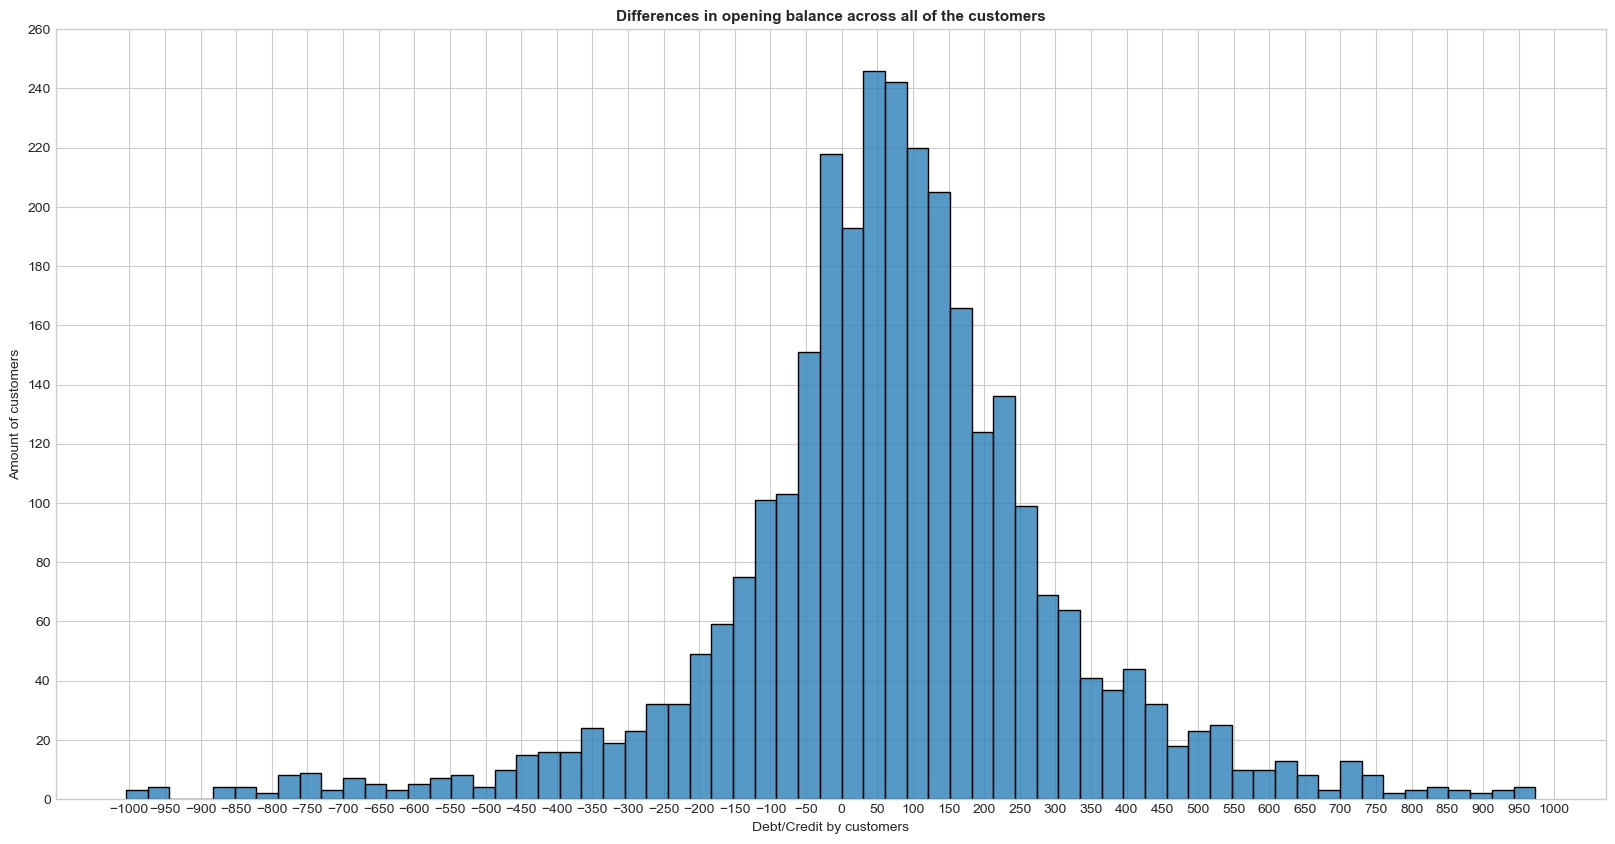

In [11]:
# Histogram plot of opening balances to show their distribution and their differences 
plt.figure(figsize=(20,10))
ax = sns.histplot((df_balance_no_duplicates.balance_issued))

# Data for the plot
ax.set_title('Differences in opening balance across all of the customers', fontweight='bold', fontsize=11)
ax.set_ylabel('Amount of customers')
ax.set_xlabel('Debt/Credit by customers')
ax.set_xticks(range(-1000, 1050, 50))
ax.set_yticks(range(0, 265, 20));

In [12]:
# Calculate the amount of money that Octopus owes to its customers and the amount that customers owe Octopus
money_company_owes_to_customers = round(df_balance_no_duplicates[df_balance_no_duplicates['balance_issued']>0]['balance_issued'].sum(), 2)
money_customers_owes_to_company = round(df_balance_no_duplicates[df_balance_no_duplicates['balance_issued']<0]['balance_issued'].sum(), 2)

In [13]:
money_company_owes_to_customers

386559.69

In [14]:
money_customers_owes_to_company

-172484.02

In [15]:
# Creation of a new column to categorize the amount of the opening balance as either customer credit or customer debt
balance = []
for index, row in df_balance_no_duplicates.iterrows():
    if row['balance_issued'] > 0:
        balance.append("customer credit")
    else:
        balance.append("customer debt")
        
df_balance_no_duplicates["balance_type"] = balance

In [16]:
# Add another column with numbers, 1 when the balance_type = customer credit and 2 when balance_type = customer debt
df_balance_no_duplicates['credit-debt'] = np.where(df_balance_no_duplicates['balance_issued']>0,1,2)

df_balance_no_duplicates

,cust_id,balance_issued,balance_type,credit-debt
0,1,517.93,customer credit,1
1,2,-21.31,customer debt,2
2,7,192.89,customer credit,1
3,14,336.32,customer credit,1
4,17,-139.56,customer debt,2
...,...,...,...,...
3084,7487,-295.83,customer debt,2
3085,7489,-31.73,customer debt,2
3086,7491,92.79,customer credit,1
3087,7492,116.79,customer credit,1


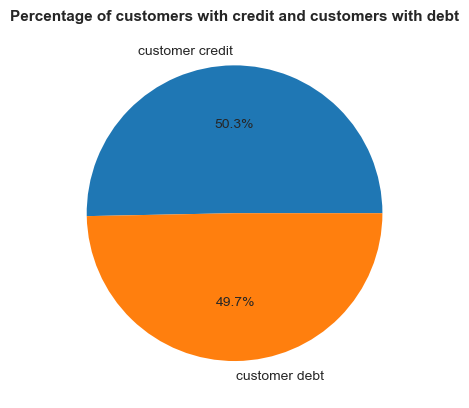

In [17]:
# Pie plot to show the percentage of customers with credit and customers with debt
df_balance_no_duplicates.groupby(['balance_type']).sum().plot(kind='pie', y = 'credit-debt', autopct='%1.1f%%')

# Data for the plot
plt.legend("", frameon=False)
plt.title("Percentage of customers with credit and customers with debt", fontweight='bold', fontsize=11)
plt.ylabel("");

### Conclusions of the analysis with respect to question 2

A histogram can be used to explain the differences in the opening balance across all of the customers, since the number of customers is large.

From the graph we can see that the distribution of customer debt/credit data is normal with a tendency to the right indicating that the money owed to customers at the end of July 2020 is greater than the money owed to Octopus by customers.

This conclusion is reinforced by the total customer credit/debt calculation, with the money owed by customers to Octopus being only 44.62% of the money owed by the company to its customers.

Other important aspects that can be extracted from the hisogram are:
* Most customers owe the company between 0 and 200 pounds.
* On the other hand, the company owes most of its customers between 0 and 400 pounds.

The pie chart shows that in July 2020 there were almost as many customers owing money to the company as there were customers to whom the company owed money. 

### 3-a.  A customer’s closing balance is determined by adding payments and subtracting charges to their opening balance. Using the balances table to determine a customer’s opening balance, and the transactions table to determine their payments and charges, illustrate a plot of a single customer’s (cust_id: 951) balance for each month

In [18]:
# SQL query to display the opening balance of the customer with cuts_id = 951

In [19]:
%%sql
SELECT strftime('%Y-%m', report_date) AS month, 
       SUM(balance_issued) AS opening_balance 
FROM balance
WHERE cust_id = 951;

 * sqlite:///case_study.db
Done.


month,opening_balance
2020-07,-66.85


In [20]:
# SQL query to calculate the customer monthly balance and transform it into a dataframe
balances_one_customer = pd.read_sql_query('''WITH first_balance AS (
  SELECT strftime('%Y-%m', report_date) AS month, SUM(balance_issued) AS opening_balance,
         cust_id
  FROM balance
  WHERE cust_id = 951
),
monthly_balances AS (
  SELECT strftime('%Y-%m', transaction_date) AS month,
         cust_id,
         SUM(CASE WHEN transaction_type = 'accountpayment' THEN amount_in_pounds ELSE -amount_in_pounds END) AS transaction_sum
  FROM transactions 
  WHERE cust_id = 951
  GROUP BY month, cust_id
),
calculated_balances AS (
  SELECT mb.month,
         mb.cust_id,
         COALESCE(SUM(mb.transaction_sum) OVER (PARTITION BY mb.cust_id ORDER BY mb.month), 0) AS closing_balance
  FROM monthly_balances AS mb
),
definitive_closing_balance AS (
  SELECT cb1.month, 
         (fb1.opening_balance + cb1.closing_balance) AS final_balances
  FROM first_balance AS fb1
  join calculated_balances AS cb1
  ON fb1.cust_id = cb1.cust_id
)
SELECT dcb.month, dcb.final_balances
FROM definitive_closing_balance AS dcb
ORDER BY dcb.month;''', cnx)

balances_one_customer

,month,final_balances
0,2020-08,71.97
1,2020-09,78.01
2,2020-10,14.70
3,2020-11,153.52
4,2020-12,73.43
5,2021-01,212.25
6,2021-02,351.07
7,2021-03,-153.45
8,2021-04,-14.63
9,2021-05,-435.81


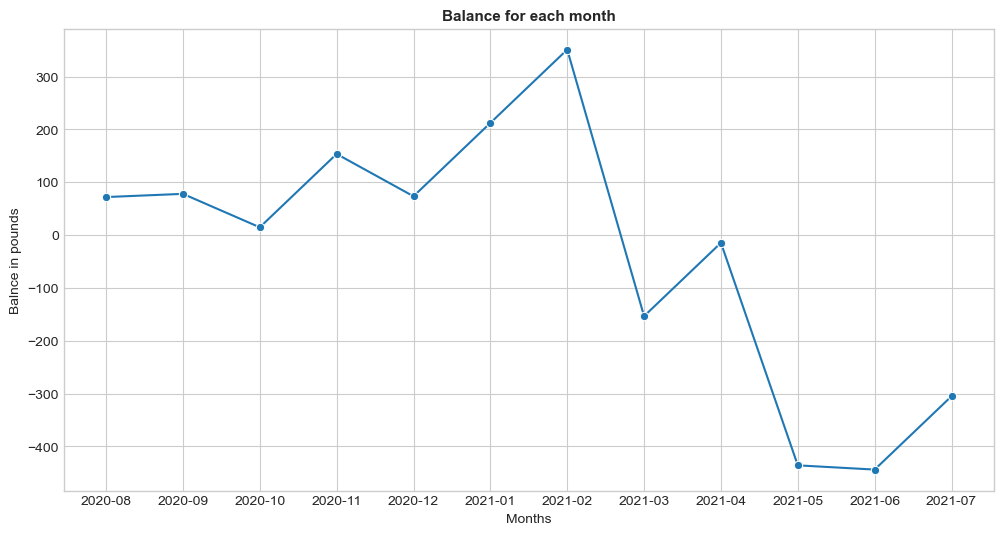

In [21]:
# Line plot to illustrate the monthly balance
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=balances_one_customer,
                  x="month", 
                  y="final_balances",
                  markers=True, 
                  dashes=False,
                  marker="o")

# Data for the plot
ax.set_title('Balance for each month', fontweight='bold', fontsize=11)
ax.set_ylabel('Balnce in pounds')
ax.set_xlabel('Months');


### Conclusions of the analysis with respect to question 3-a

The client with cust_id = 951 had an opening balance of -66.85 (he opened his balance owing money to Octopus), then from August 2020 he paid off the debts and his monthly balance went above zero and remained in this situation until January 2021 as in March and up to the closing balance he remained below zero closing with a debt of -305 pounds.

### 3-b.  determine whether the following customers (927, 1337, 3217, 4718) are paying sufficient amounts to ensure their closing balance in July 2021 is not lower than their opening balance in July 2020

In [22]:
# SQL query to display the opening balance of the customers with cuts_id = (927, 1337, 3217, 4718) and transform it into a dataframe
opening_balances_four_cust = pd.read_sql_query('''SELECT 
  cust_id, 
  strftime('%Y-%m', report_date) as month, 
  SUM(balance_issued) AS opening_balance 
FROM balance
WHERE cust_id = 927 OR cust_id = 1337 or cust_id = 3217 OR cust_id = 4718
GROUP BY cust_id;''', cnx)

opening_balances_four_cust

,cust_id,month,opening_balance
0,927,2020-07,148.58
1,1337,2020-07,-223.24
2,3217,2020-07,311.73
3,4718,2020-07,317.04


In [23]:
# SQL query to calculate the 4 customers closing balance and transform it into a dataframe
closing_balances_four_cust = pd.read_sql_query('''WITH first_balance AS (
  SELECT strftime('%Y-%m', report_date) AS month, SUM(balance_issued) AS opening_balance,
         cust_id
  FROM balance
  WHERE cust_id = 927 OR cust_id = 1337 OR cust_id = 3217 OR cust_id = 4718
  GROUP by cust_id
),
monthly_balances AS (
  SELECT strftime('%Y-%m', transaction_date) AS month,
         cust_id,
         SUM(CASE WHEN transaction_type = 'accountpayment' THEN amount_in_pounds ELSE -amount_in_pounds END) AS transaction_sum
  FROM transactions 
  WHERE cust_id = 927 OR cust_id = 1337 OR cust_id = 3217 OR cust_id = 4718
  GROUP BY month, cust_id
),
calculated_balances AS (
  SELECT mb.month,
         mb.cust_id,
         COALESCE(SUM(mb.transaction_sum) OVER (PARTITION BY mb.cust_id ORDER BY mb.month), 0) AS closing_balance
  FROM monthly_balances as mb
),
definitive_closing_balance as (
  SELECT cb1.month,
         cb1.cust_id,
         (fb1.opening_balance + cb1.closing_balance) AS closing_balances
  FROM first_balance AS fb1
  join calculated_balances AS cb1
  ON fb1.cust_id = cb1.cust_id
)
SELECT dcb.cust_id, dcb.month, dcb.closing_balances
FROM definitive_closing_balance AS dcb
WHERE dcb.month = '2021-07'
ORDER BY dcb.cust_id ASC, dcb.month;''', cnx)

closing_balances_four_cust

,cust_id,month,closing_balances
0,927,2021-07,-117.31
1,1337,2021-07,-239.63
2,3217,2021-07,292.15
3,4718,2021-07,-8.37


In [24]:
# Combine the opening and closing balance in a single data frame
df_opening_closing_balances = pd.DataFrame().assign(cust_id = opening_balances_four_cust['cust_id'], 
                                                    month_opening = opening_balances_four_cust['month'],
                                                    opening_balance = opening_balances_four_cust['opening_balance'],
                                                    month_closing = closing_balances_four_cust['month'],
                                                    closing_balance = closing_balances_four_cust['closing_balances'])

df_opening_closing_balances 

,cust_id,month_opening,opening_balance,month_closing,closing_balance
0,927,2020-07,148.58,2021-07,-117.31
1,1337,2020-07,-223.24,2021-07,-239.63
2,3217,2020-07,311.73,2021-07,292.15
3,4718,2020-07,317.04,2021-07,-8.37


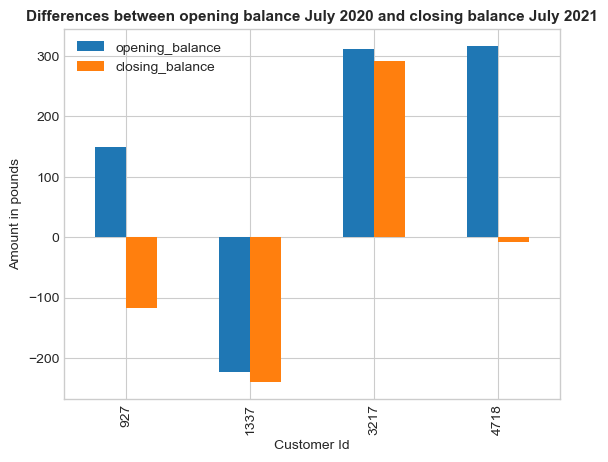

In [25]:
# Bar plot to show the differences between customer opening and closing balance
ax = df_opening_closing_balances.plot(x='cust_id', y=['opening_balance', 'closing_balance'], kind='bar')

# Data for the plot
ax.set_title('Differences between opening balance July 2020 and closing balance July 2021', fontweight='bold', fontsize=11)
ax.set_xlabel('Customer Id') 
ax.set_ylabel('Amount in pounds')
ax.legend().set_visible(True)

### Conclusions of the analysis with respect to question 3-b

As can be seen in the bar plot, in all cases, none of the customers are paying enough as all their closing balances in July 2021 are lower than their opening balances in July 2020. 

* Customers 927, 1337 and 4718 ended up owing money to the company at the closing balance in July 2021
* Only customer 3217 ended with a credit on the closing balance, but was still below its opening balance.

### 4. Given a price increase of 10% at the end of July 2020, calculate an estimate for what each customer’s closing balance will be in July 2021, assuming payment amounts stay the same. What proportion will have become debtors (having a positive opening balance in July 2020 and then having a closing negative balance in July 2021)?

In [26]:
# SQL query to calculate the closing balance of all customers
closing_balances_all_cust = pd.read_sql_query('''WITH first_balance as (
  select strftime('%Y-%m', report_date) as month, balance_issued as opening_balance,
         cust_id
  from balance
  GROUP BY cust_id 
),
monthly_balances AS (
  SELECT strftime('%Y-%m', transaction_date) AS month,
         cust_id,
         SUM(CASE WHEN transaction_type = 'accountpayment' THEN amount_in_pounds ELSE -amount_in_pounds END) AS transaction_sum
  FROM transactions 
  GROUP BY month, cust_id
),
calculated_balances AS (
  SELECT mb.month,
         mb.cust_id,
         COALESCE(SUM(mb.transaction_sum) OVER (PARTITION BY mb.cust_id ORDER BY mb.month), 0) AS almost_closing_balance
  FROM monthly_balances as mb
),
definitive_closing_balance as (
  select cb1.month, 
         cb1.cust_id,
         (fb1.opening_balance + cb1.almost_closing_balance) as closing_balances
  from first_balance as fb1
  join calculated_balances as cb1
  on fb1.cust_id = cb1.cust_id
)
SELECT dcb.cust_id, dcb.month, dcb.closing_balances
FROM definitive_closing_balance as dcb
where dcb.month = '2021-07'
ORDER BY dcb.cust_id, dcb.month;''', cnx)

closing_balances_all_cust

,cust_id,month,closing_balances
0,1,2021-07,1069.14
1,2,2021-07,-195.43
2,7,2021-07,-289.10
3,14,2021-07,383.91
4,17,2021-07,-251.36
...,...,...,...
2716,7487,2021-07,-186.17
2717,7489,2021-07,656.03
2718,7491,2021-07,-56.89
2719,7492,2021-07,-164.94


In [27]:
# SQL query to calculate the closing balance of all customers with a 10% price increase at the end of July 2020
price_increase_closing_balances = pd.read_sql_query('''WITH first_balance as (
  select strftime('%Y-%m', report_date) as month, balance_issued as opening_balance,
         cust_id
  from balance
  GROUP BY cust_id 
),
monthly_balances AS (
  SELECT strftime('%Y-%m', transaction_date) AS month,
         cust_id,
         SUM(CASE WHEN transaction_type = 'accountpayment' THEN amount_in_pounds ELSE -amount_in_pounds * 1.1 END) AS transaction_sum
  FROM transactions 
  GROUP BY month, cust_id
),
calculated_balances AS (
  SELECT mb.month,
         mb.cust_id,
         COALESCE(SUM(mb.transaction_sum) OVER (PARTITION BY mb.cust_id ORDER BY mb.month), 0) AS almost_closing_balance
  FROM monthly_balances as mb
),
definitive_closing_balance as (
  select cb1.month, 
         cb1.cust_id,
         (fb1.opening_balance + cb1.almost_closing_balance) as closing_balances
  from first_balance as fb1
  join calculated_balances as cb1
  on fb1.cust_id = cb1.cust_id
)
SELECT dcb.cust_id, dcb.month, dcb.closing_balances
FROM definitive_closing_balance as dcb
where dcb.month = '2021-07'
ORDER BY dcb.cust_id, dcb.month;''', cnx)

price_increase_closing_balances

,cust_id,month,closing_balances
0,1,2021-07,884.261
1,2,2021-07,-322.690
2,7,2021-07,-437.622
3,14,2021-07,274.357
4,17,2021-07,-390.048
...,...,...,...
2716,7487,2021-07,-270.310
2717,7489,2021-07,343.301
2718,7491,2021-07,-175.226
2719,7492,2021-07,-294.243


In [28]:
# Combine the closing balances and closing balances with a 10% price increase in a single data frame
balances_and_balances_price_increase = pd.DataFrame().assign(cust_id = closing_balances_all_cust['cust_id'], 
                                                                             month_closing = closing_balances_all_cust['month'],
                                                                             closing_balance = closing_balances_all_cust['closing_balances'],
                                                                             closing_balance_price_increase = price_increase_closing_balances['closing_balances'])

balances_and_balances_price_increase

,cust_id,month_closing,closing_balance,closing_balance_price_increase
0,1,2021-07,1069.14,884.261
1,2,2021-07,-195.43,-322.690
2,7,2021-07,-289.10,-437.622
3,14,2021-07,383.91,274.357
4,17,2021-07,-251.36,-390.048
...,...,...,...,...
2716,7487,2021-07,-186.17,-270.310
2717,7489,2021-07,656.03,343.301
2718,7491,2021-07,-56.89,-175.226
2719,7492,2021-07,-164.94,-294.243


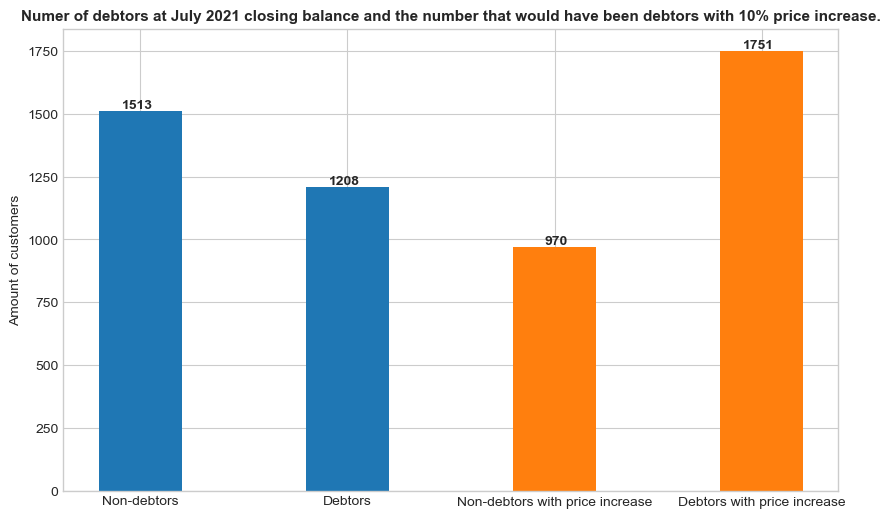

In [29]:
# Calculation of the amount of non-debtor and debtors customers without price increase
non_debtors = balances_and_balances_price_increase[balances_and_balances_price_increase['closing_balance'] > 0]
debtors = balances_and_balances_price_increase[balances_and_balances_price_increase['closing_balance'] < 0]

non_debtors_count = non_debtors.shape[0]
debtors_count = debtors.shape[0]

# Calculation of the amount of non-debtor and debtors customers with a 10% price increase
non_debtors_price_increase = balances_and_balances_price_increase[balances_and_balances_price_increase['closing_balance_price_increase'] > 0]
debtors_price_increase = balances_and_balances_price_increase[balances_and_balances_price_increase['closing_balance_price_increase'] < 0]

non_debtors_price_increase_count = non_debtors_price_increase.shape[0]
debtors_price_increase_count = debtors_price_increase.shape[0]

# Bar plot to show the proportion of customers who would become debtors with a price increase of 10%.
labels = ['Non-debtors', 'Debtors']
counts = [non_debtors_count, debtors_count]

labels1 = ['Non-debtors with price increase', 'Debtors with price increase']
counts1 = [non_debtors_price_increase_count, debtors_price_increase_count]

plt.figure(figsize=(10,6))
plt.bar(labels, counts, width=0.4, align='center')
plt.bar(labels1, counts1, width=0.4, align='center')

# Data for the plot
plt.ylabel('Amount of customers')
plt.title('Numer of debtors at July 2021 closing balance and the number that would have been debtors with 10% price increase.', fontweight='bold', fontsize=11)
plt.text(x=-0.09, y=1520, s=counts[0], fontweight='bold')
plt.text(x=0.91, y=1218, s=counts[1], fontweight='bold')
plt.text(x=1.95, y=980, s=counts1[0], fontweight='bold')
plt.text(x=2.91, y=1761, s=counts1[1], fontweight='bold');

### Conclusions of the analysis with respect to question 4

The graph shows that in the real situation (without the 10% increase in prices) the percentage of debtor customers at the closing balance of July 2021 is 44.40% of the total number of customers.

In the hypothetical scenario of a 10% price increase at the end of July 2020, the percentage of customers that would have become debtors at the closing balance of July 2021 would be 64.35% of the total, which would represent an increase of almost 20% of debtor customers.

### If you have time, the management team would like to understand which customers are paying the correct Direct Debit amount (note this only applies to Fixed Direct Debit customers)

In [30]:
# SQL query to show which customers are paying the correct Direct Debit amount
cust_paying_correct_debit = pd.read_sql_query('''WITH fixed_cust AS (
  SELECT cust_id
  FROM balance
  WHERE payment_method = 'Fixed DD'
),
monthly_balances AS (
  SELECT strftime('%Y-%m', transaction_date) AS month,
         cust_id,
         SUM(CASE WHEN transaction_type = 'accountpayment' THEN amount_in_pounds ELSE -amount_in_pounds END) AS transaction_sum
  FROM transactions 
  GROUP BY month, cust_id
),
calculated_balances AS (
  SELECT mb.month,
         mb.cust_id,
         COALESCE(SUM(mb.transaction_sum) OVER (PARTITION BY mb.cust_id ORDER BY mb.month), 0) AS transactions_balance
  FROM monthly_balances AS mb
)
SELECT fc.cust_id, cb.month, cb.transactions_balance
FROM fixed_cust AS fc
JOIN calculated_balances AS cb ON fc.cust_id = cb.cust_id
/*WHERE cb.month = '2021-07'*/
where cb.transactions_balance = 0
ORDER BY fc.cust_id, cb.month;''', cnx)

cust_paying_correct_debit

,cust_id,month,transactions_balance


If by customers who are paying the correct Direct Debit amount the management team means those who pay exactly the amount they are charged for the service, the answer is that I could not find any, because when I consulted the database for the balance of charges and payments by month, none of them gave me exactly zero, only some customers in some months came close to zero but it was never exactly zero.

### For the customers in question 3, part b) of those which are paying insufficient amounts, what value should the payment amount be increased to so that the closing balance in July 2021 is not less than the opening balance in July 2020? When do you think would be the best time of year to change the payment amount?

To answer this question the code used to calculate the closing balances in question 3 part b) can and modify in this specific section: ( SUM(CASE WHEN transaction_type = 'accountpayment' THEN amount_in_pounds ELSE -amount_in_pounds END) AS transaction_sum) adding a multiplication to the first amount_in_pounds to return the result of the closing balance with the increase in accountpayment that we indicate.

Specifically I was testing with different values until the closing balance of each one of the clients was above the opening balance of July 2020.

To have a closing balance in July 2021 higher than the opening balance in July 2020 the payments should be increased by:
* 19.88% for the customer with cust_id = 927
* 2.70% for customer with cust_id =1337
* 1.65% for customer with cust_id = 3217
* 16.10% for the customer with cust_id = 4718

***Regarding the moment at which it would be better to increase payments:***

Based on what I could observe from the data in the monthly balances, I believe that the best time to increase the value of the payments is in late fall or early winter, approximately between October and December, mainly because in the winter months historically more energy is consumed and it is essential for the customers, also according to the monthly balance data, approximately 75% of customers are with a positive balance in the month of November, being one of the months with the highest number of customers with a positive balance, This could help reduce a possible negative response from customers to the increased value of the payments they are required to make.

Another good reason to increase payments in those months could be to help reduce inefficient energy consumption, since when prices go up people tend to be more careful with their consumption and thus reduce the impact this has on emissions.